In [7]:
%matplotlib inline
import os

GIMME_DIR = "/Volumes/WorkDrive/gimmeSAD"
SIMOUT_DIR = os.path.join(GIMME_DIR, "replicates/")

os.chdir(GIMME_DIR)
import implicit_BI
import gimmeSAD
import numpy as np
import matplotlib.pyplot as plt
import itertools
import glob


In [122]:
def load_pidxy(filename):
    with open(filename) as infile:
        dat = []
        while True:
            next_n_lines = list(itertools.islice(infile, 12))
            if not next_n_lines:
                break
            lines = [list(x.strip("[").strip("]\n").split()) for x in next_n_lines[1:-1]]
            lines = list(itertools.chain.from_iterable([ map(int, x) for x in lines]))
            dat.append(lines)
    #dat = np.array(dat)
    return dat

In [120]:
with open("/Volumes/WorkDrive/gimmeSAD/output/pi_x_dxy.log") as infile:
    dat = []
    while True:
        next_n_lines = list(itertools.islice(infile, 12))
        if not next_n_lines:
            break
        lines = [list(x.strip("[").strip("]\n").split()) for x in next_n_lines[1:-1]]
        lines = list(itertools.chain.from_iterable([ map(int, x) for x in lines]))
        dat.append(lines)
dat = np.array(dat)
print(dat.shape)

(10,)


In [5]:
from matplotlib.mlab import PCA
print(dat.shape)
res = PCA(np.array(dat.T))

(57, 100)


lenfiles 66
lenfiles 66
explained variance ratio (first two components): [ 0.94003892  0.04603198]
doing 1 - lightsalmon doing 7 - tomato doing 9 - red doing 1 - royalblue doing 7 - blue doing 9 - navy

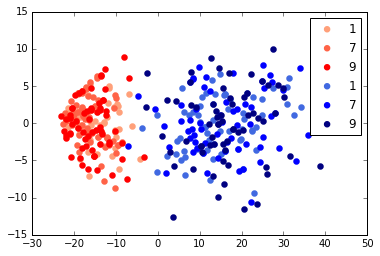

In [123]:
import collections 
SIMOUT_DIR = "tmp/"
C = ["0.01", "0.05"]
times = [1,7,9]
full_dat = []
subset_dat = []
for c in C:
    files = glob.glob(SIMOUT_DIR+"K_1000-C_{}*/pi_x_dxy.log".format(c))
    print("lenfiles {}".format(len(files)))
    full_dat = []
    for f in files:
        try:
            full_dat.append(load_pidxy(f))
        except:
            pass
    for t in times:
        subset_dat.extend([x[t] for x in full_dat])
pca = PCA(n_components=2)

X_r = pca.fit(subset_dat).transform(subset_dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["lightsalmon", "tomato", "red", "royalblue", "blue", "navy"], [66]*6, times*2):
    print("doing {} - {}".format(size, col)),
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper right', scatterpoints=1)
plt.show()

(57, 100)
explained variance ratio (first two components): [ 0.62286836  0.23778228]


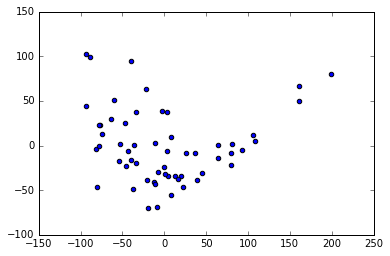

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print(dat.shape)
pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x, y = zip(*X_r)
plt.scatter(x, y)

In [115]:
print([np.sum(x) for x in subset_dat])

[43, 40, 33, 37, 44, 50, 41, 35, 37, 37, 48, 47, 34, 33, 40, 34, 30, 39, 35, 39, 39, 40, 37, 44, 35, 36, 50, 35, 26, 42, 38, 42, 48, 36, 43, 41, 38, 37, 42, 39, 45, 40, 39, 41, 44, 41, 36, 42, 42, 42, 46, 45, 41, 37, 35, 37, 23, 43, 41, 47, 36, 39, 36, 54, 42, 43, 39, 41, 36, 45, 43, 39, 43, 39, 33, 46, 34, 44, 44, 33, 43, 39, 28, 39, 42, 36, 32, 44, 40, 39, 38, 38, 50, 39, 49, 40, 43, 35, 42, 43, 35, 42, 47, 40, 31, 45, 42, 30, 40, 50, 39, 34, 36, 42, 44, 44, 43, 45, 31, 44, 43, 48, 34, 32, 44, 38, 31, 37, 38, 37, 31, 37, 39, 42, 49, 53, 32, 36, 29, 45, 46, 38, 31, 47, 39, 47, 33, 41, 40, 44, 41, 34, 27, 39, 34, 37, 42, 40, 46, 42, 37, 39, 31, 44, 36, 43, 38, 39, 45, 41, 46, 37, 39, 41, 47, 47, 42, 46, 35, 46, 39, 37, 38, 36, 35, 35, 32, 45, 36, 42, 37, 39, 33, 43, 40, 42, 41, 29, 91, 100, 95, 106, 91, 108, 93, 111, 102, 99, 84, 90, 101, 93, 95, 99, 94, 109, 103, 101, 85, 99, 100, 94, 92, 112, 100, 96, 99, 105, 112, 103, 103, 96, 104, 102, 93, 96, 94, 94, 108, 93, 92, 97, 103, 105, 92

## Plot colonization rates

66
66
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
(1320, 100)
explained variance ratio (first two components): [ 0.81530358  0.05690712]
doing 0.05 - red
doing 0.01 - blue


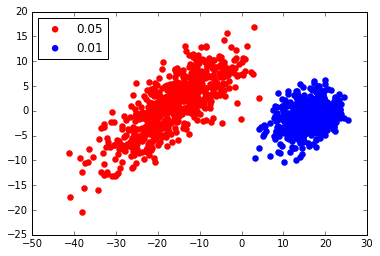

In [96]:
SIMOUT_DIR="tmp/"
K = [10000, 5000, 1000]
C = [0.05, 0.01]

dat = []
lens = []
for c in C:

    datfiles = glob.glob(SIMOUT_DIR+"K_1000-C_{}*/pi_x_dxy.log".format(c))
    print(len(datfiles))
    for f in datfiles:
        mydat = load_pidxy(f)
        dat.extend(mydat)
        lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue"], [len(dat)/2]*2, C):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()

In [91]:
len(dat)

1320

## Plot local community sizes

/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_5000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_1000-C_0.01/pi_x_dxy.log
[100, 46, 2]
(148, 100)
explained variance ratio (first two components): [ 0.7633547   0.11368971]
doing 10000 - red
doing 5000 - blue
doing 1000 - yellow


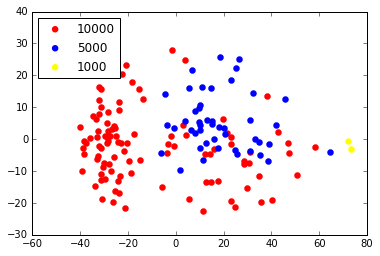

In [219]:
os.chdir(SIMOUT_DIR)
K = [10000, 5000, 1000]
C = [0.1, 0.01, 0.001]
multi_col = ["", "_x4", "_x10"]

dat = []
lens = []
for k in K:
    datfile = os.path.join(SIMOUT_DIR, "K_{}-C_0.01/pi_x_dxy.log".format(k))
    print(datfile)
    mydat = load_pidxy(datfile)
    dat.extend(mydat)
    lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue", "yellow"], lens, K):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()

# Get data and make matrices

In [235]:
def make_heatmaps(rowlist, max_pi, max_dxy):
    heat_size = 5
    heats = []
    ## Make the bins
    pi_bins = np.linspace(0, max_pi, heat_size)
    pi_island_bins = np.linspace(0, max_dxy, heat_size)
    
    for row in rowlist:
        #print(row, len(row))
        heat = np.zeros((heat_size, heat_size), dtype=np.int)

        pis = zip(row[3], row[4])
        ## Set a reasonable default
        #max_pi = max_pi_island = 0.1
        #if pis.any():
            #max_pi = max([x[0] for x in pis])
            #max_pi_island = max([x[1] for x in pis])
            #print(max_pi, max_pi_island)


        ## Now you have the bins each value belongs in, but you need to 
        ## go through and populate the heat matrix
        for pi, pi_island in pis:
            count_pi = 0
            count_pi_island = 0
            try:
                while not pi <= pi_bins[count_pi]:
                    count_pi += 1
                while not pi_island <= pi_island_bins[count_pi_island]:
                    count_pi_island += 1
                ## increment the heatmap point this corresponds to
                heat[count_pi][count_pi_island] += 1
            except:
                heat[heat_size-1][heat_size-1] += 1
        heats.append(heat)
    return(heats)
heats = make_heatmaps(rowlist, max_pi, max_dxy)

In [168]:
import pandas as pd

os.chdir("/Volumes/WorkDrive/gimmeSAD/replicates/")
num_species = 30

## The values of K and c we're testing
K = ["1000", "5000"]
C = ["0.01", "0.05"]


## Create the column names
abund_idx = ["abundance_{}".format(x) for x in xrange(0,num_species)]
pis_idx = ["pi_{}".format(x) for x in xrange(0,num_species)]
dxy_idx = ["dxy_{}".format(x) for x in xrange(0,num_species)]

rowlist = []
for k in K:
    for c in C:
        dirs = glob.glob("K_{}-C_{}*".format(k, c))
        print("n {} - {}".format(dirs, len(dirs)))
        
        for d in dirs:
            with open(os.path.join(d, "pi_x_dxy.log")) as infile:
                lines = infile.readlines()
                for line in lines:
                    if "step" in line:
                        try:
                            sumstats = eval(line.split(" - ")[1])
                        except:
                            continue
                        if len(sumstats) >= num_species:
                            step = line.split(" - ")[0].split()[1]
                            wat = [step, k, c, [x[0] for x in sumstats.values()][:num_species],\
                                        [x[1] for x in sumstats.values()][:num_species]]
                            rowlist.append(wat)
                            
dat = pd.DataFrame(rowlist, columns=["step", "K", "C", "pis", "dxys"]) 

n ['K_1000-C_0.01_1476044316.61', 'K_1000-C_0.01_1476044473.39', 'K_1000-C_0.01_1476044593.42', 'K_1000-C_0.01_1476044713.44', 'K_1000-C_0.01_1476044833.46', 'K_1000-C_0.01_1476044953.49', 'K_1000-C_0.01_1476045073.51', 'K_1000-C_0.01_1476045193.53', 'K_1000-C_0.01_1476045313.56', 'K_1000-C_0.01_1476045433.58', 'K_1000-C_0.01_1476045553.6', 'K_1000-C_0.01_1476045673.63', 'K_1000-C_0.01_1476045793.65', 'K_1000-C_0.01_1476045913.67', 'K_1000-C_0.01_1476046033.7', 'K_1000-C_0.01_1476046153.72', 'K_1000-C_0.01_1476046273.75', 'K_1000-C_0.01_1476046393.77', 'K_1000-C_0.01_1476046513.79', 'K_1000-C_0.01_1476046633.81', 'K_1000-C_0.01_1476046753.84', 'K_1000-C_0.01_1476046873.86', 'K_1000-C_0.01_1476046993.88', 'K_1000-C_0.01_1476047113.91', 'K_1000-C_0.01_1476047233.93', 'K_1000-C_0.01_1476047353.95', 'K_1000-C_0.01_1476047473.98', 'K_1000-C_0.01_1476047594.0', 'K_1000-C_0.01_1476047714.03', 'K_1000-C_0.01_1476047834.05', 'K_1000-C_0.01_1476047954.07', 'K_1000-C_0.01_1476048074.1', 'K_1000-C

In [236]:
max_pi = np.max([x[3] for x in rowlist])
print(max_pi)
mean_pi = np.mean([x[3] for x in rowlist])
print(mean_pi)
std_pi = np.std([x[3] for x in rowlist])
print(std_pi)
max_dxy = np.max([x[4] for x in rowlist])
print(max_dxy)
mean_dxy = np.mean([x[4] for x in rowlist])
print(mean_dxy)
std_dxy = np.std([x[4] for x in rowlist])
print(std_dxy)
max_pi = mean_pi + 2*std_pi
max_dxy = mean_dxy + 2*std_dxy
print(max_pi, max_dxy)
heats = make_heatmaps(rowlist, max_pi, max_dxy)

0.234013157895
0.0101875706504
0.0122966510668
0.3465
0.0134728061123
0.0166241170698
(0.034780872784023184, 0.046721040251905405)


(3343, 25)
explained variance ratio (first two components): [ 0.65913704  0.12805817]


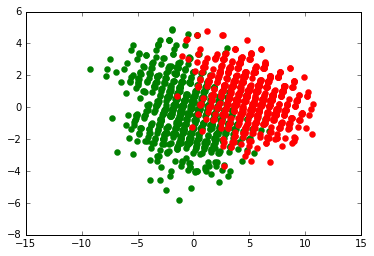

In [242]:
heat_dat = []
for h in heats:
    heat_dat.append([item for sublist in h for item in sublist])
heat_dat = np.array([heat_dat])[0]
print(heat_dat.shape)
pca = PCA(n_components=2)
X_r = pca.fit(heat_dat).transform(heat_dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
idx = 0
quarter = len(rowlist)/4-13
half = len(rowlist)/2-9
last = len(rowlist)*3/4-5

# Small K small c
#plt.scatter(x[:quarter], y[:quarter], color='b', label=size, lw=2)
# Small K big c
plt.scatter(x[quarter:half], y[quarter:half], color='g', label=size, lw=2)
# Big K small c
plt.scatter(x[last:], y[last:], color='r', label=size, lw=2)
# Big K big c
#plt.scatter(x[half:last], y[half:last], color='y', label=size, lw=2)

In [195]:
print(heat_dat[0][1])

[0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 3 3 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 5]


In [229]:
rowlist[len(rowlist)*3/4-5]

['1000000',
 '5000',
 '0.01',
 [0.0005986842105263158,
  0.023513157894736837,
  0.004809210526315789,
  0.01096052631578947,
  0.0017894736842105263,
  0.0008881578947368421,
  0.02795394736842106,
  0.014552631578947364,
  0.0022763157894736845,
  0.024611842105263154,
  0.014526315789473674,
  0.02847368421052634,
  0.00393421052631579,
  0.0022434210526315794,
  0.003375000000000001,
  0.01510526315789474,
  0.029052631578947396,
  0.017756578947368415,
  0.004513157894736845,
  0.002144736842105263,
  0.011934210526315783,
  0.00461842105263158,
  0.0029934210526315792,
  0.0069276315789473675,
  0.007019736842105264,
  0.005546052631578948,
  0.0025460526315789476,
  0.048052631578947416,
  0.0034210526315789484,
  0.038881578947368385],
 [0.0008749999999999999,
  0.02625000000000004,
  0.007875,
  0.014249999999999995,
  0.00225,
  0.001125,
  0.034875000000000045,
  0.019749999999999993,
  0.002425,
  0.04037499999999999,
  0.022,
  0.0345,
  0.0045,
  0.0028750000000000004,
  